In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
bi_df = pd.read_csv('../Model Data/binary_outcome_no_stock.csv')
bi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              763 non-null    int64  
 1   Unnamed: 0.1                            763 non-null    int64  
 2   Date                                    763 non-null    object 
 3   Binary_Class                            763 non-null    object 
 4   Search Date                             763 non-null    object 
 5   alcoholism                              763 non-null    int64  
 6   anxiety                                 763 non-null    int64  
 7   athleisure                              763 non-null    int64  
 8   cutting hair                            763 non-null    int64  
 9   depression                              763 non-null    int64  
 10  dry cough                               763 non-null    int64 

In [4]:
bi_df = bi_df.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Search Date', 'Date'})
bi_df = bi_df.dropna()
bi_df.head()

,Binary_Class,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,flu symptoms,...,instacart jobs,gig economy,stimmy,trump,biden,china,Current Hospitalized COVID-19 Patients,Total Doses Administered,Daily Increase,Number of Flights
10,Low,42,83,28,30,75,15,59,26,9,...,21,9,0,2,2,25,119692.43,548792878.0,144101.0,162754.0
11,Low,37,87,31,27,68,14,63,28,9,...,14,6,0,2,2,24,123137.57,548648777.0,327557.0,182400.0
12,High,43,88,17,23,70,14,80,32,8,...,17,1,0,2,2,25,126537.14,548321220.0,582026.0,199407.0
13,High,42,90,45,25,72,14,71,38,9,...,14,2,0,2,2,24,129780.71,547739194.0,473174.0,197247.0
14,High,39,75,100,35,52,14,81,38,9,...,15,3,0,3,2,25,132730.71,547266020.0,478132.0,194573.0


In [5]:
X = bi_df.drop(columns=['Binary_Class'])
y = bi_df['Binary_Class']
target_names = ["High", "Low"]

In [6]:
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42)

In [8]:
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.9086021505376344


In [9]:
feature_importances = rfc.feature_importances_

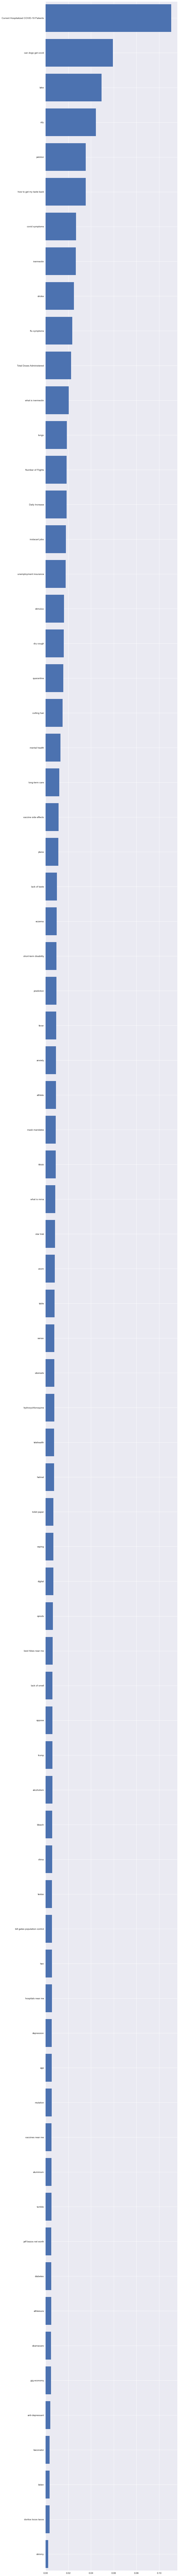

In [10]:
features = sorted(zip(X.columns, rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

<AxesSubplot:>

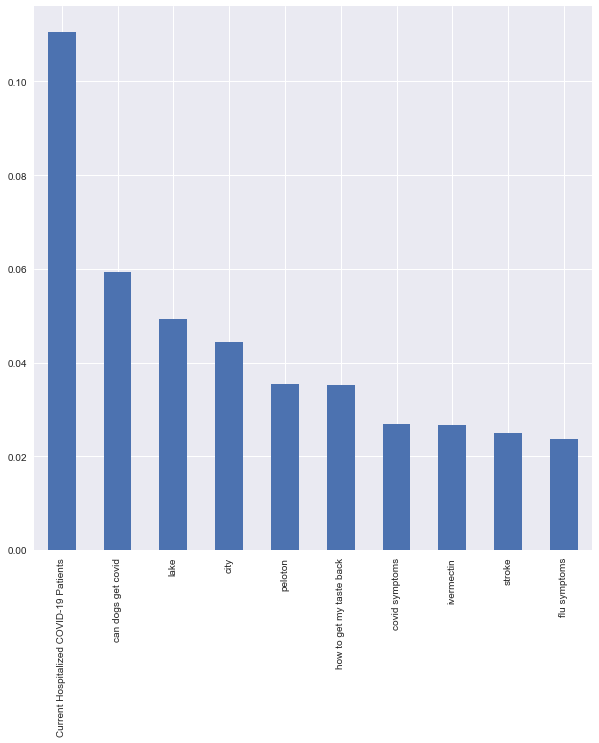

In [11]:
feat_plot=pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(10).sort_values(ascending=False)[:200].plot(kind='bar', figsize=(10,10))
feat_plot